In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Define the path to the train data directory
train_data_path = 'cifake dataset/train'

# Create empty lists to store image data and labels
data = []
labels = []

# Loop through the REAL and FAKE subfolders in the train data directory
for folder in os.listdir(train_data_path):
    folder_path = os.path.join(train_data_path, folder)
    label = folder  # Label is either 'REAL' or 'FAKE'

    # Loop through the images in each subfolder
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (32, 32))  # Resize images to 32x32
        data.append(image)
        labels.append(label)

In [3]:
# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

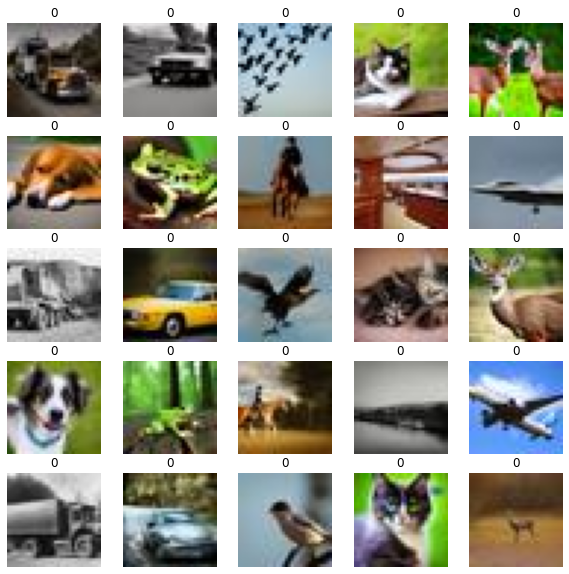

In [4]:
# Visualize some sample images
plt.figure(figsize=(10, 10))
for i in range(25):  # Change the number to the desired number of samples
    plt.subplot(5, 5, i + 1)
    plt.imshow(cv2.cvtColor(data[i], cv2.COLOR_BGR2RGB))
    plt.title(labels[i])
    plt.axis('off')
plt.show()

In [5]:
# Compute and visualize the correlation matrix
data_flatten = data.reshape(data.shape[0], -1)  # Flatten the image data
correlation_matrix = np.corrcoef(data_flatten.T)  # Calculate the correlation matrix

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
# Flatten the data for t-SNE
data_flatten = data.reshape(data.shape[0], -1)
print("flattened")

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
data_std = scaler.fit_transform(data_flatten)
print("standardized")

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_std)
print("TSNE done")

In [ ]:
# Create a scatter plot to visualize the images in 2D space
plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis', marker='.')
plt.title('t-SNE Visualization of Real and Fake Images')
plt.colorbar()
plt.show()

In [ ]:
# Create histograms to visualize pixel intensity distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data_flatten[labels == 0].flatten(), bins=50, color='b', alpha=0.5, label='REAL')
plt.hist(data_flatten[labels == 1].flatten(), bins=50, color='r', alpha=0.5, label='FAKE')
plt.title('Pixel Intensity Distribution (All Channels)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(data_flatten[labels == 0].flatten(), bins=50, color='b', alpha=0.5, label='REAL', density=True)
plt.hist(data_flatten[labels == 1].flatten(), bins=50, color='r', alpha=0.5, label='FAKE', density=True)
plt.title('Normalized Pixel Intensity Distribution (All Channels)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency (Normalized)')
plt.legend()
plt.show()